In [1]:
#Loading the Library:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:

df.shape

(15080, 12)

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [6]:
#Creating Dummy variables for Industry, Segments, Grouped Countries

dataset2 = pd.get_dummies(df, columns =[''])

In [7]:
dataset2 = dataset2.drop([''],axis = 1)

In [9]:
#scale the data so the variance across the different variables are equal
#### 3
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(dataset2)
data_tr_std = mms.transform(dataset2)

In [10]:
data_tr_std.shape

(15080, 42)

In [11]:
pca_mod = PCA()
reduced_data = pca_mod.fit_transform(data_tr_std)
reduced_data.shape

(15080, 42)

In [12]:
pca_mod.explained_variance_ratio_

array([1.17410317e-01, 9.91491255e-02, 7.55811097e-02, 6.88332061e-02,
       5.59641438e-02, 4.65067538e-02, 4.05078532e-02, 4.03000856e-02,
       3.47941463e-02, 3.29992034e-02, 3.11206629e-02, 2.81540118e-02,
       2.76765444e-02, 2.62687477e-02, 2.36213923e-02, 2.33831729e-02,
       2.22913244e-02, 2.07434974e-02, 1.94559011e-02, 1.89660826e-02,
       1.79968503e-02, 1.72345018e-02, 1.59803517e-02, 1.49085782e-02,
       1.38396798e-02, 1.21212090e-02, 1.08956933e-02, 1.03135979e-02,
       8.77405639e-03, 7.72264616e-03, 6.26507576e-03, 5.30035738e-03,
       1.81197478e-03, 1.21171320e-03, 7.67538337e-04, 4.34990023e-04,
       3.66959729e-04, 1.49836316e-04, 9.67038253e-05, 5.43823306e-05,
       2.24110190e-05, 3.61117521e-06])

<Figure size 432x288 with 0 Axes>

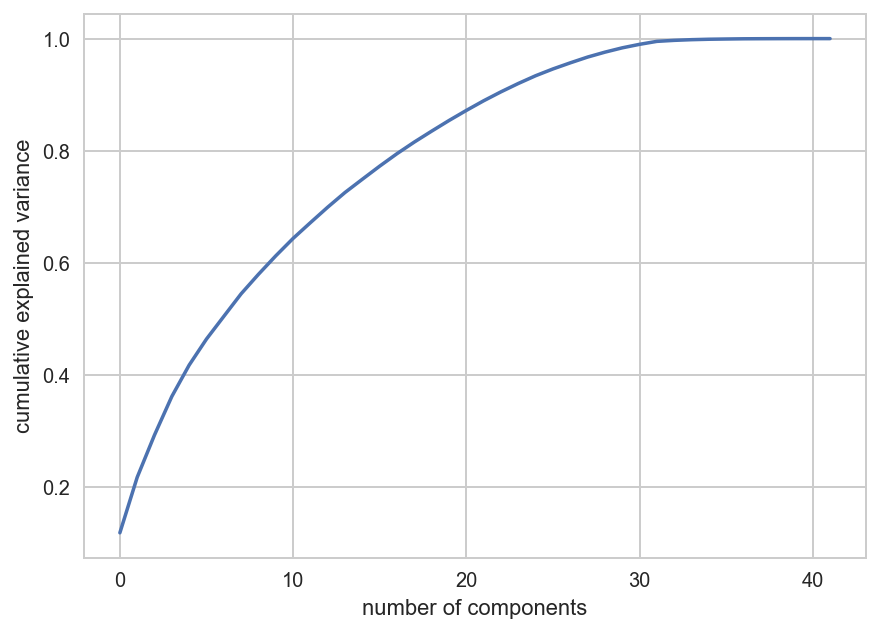

None

In [13]:
plt.clf()
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca_mod.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
display(plt.show())

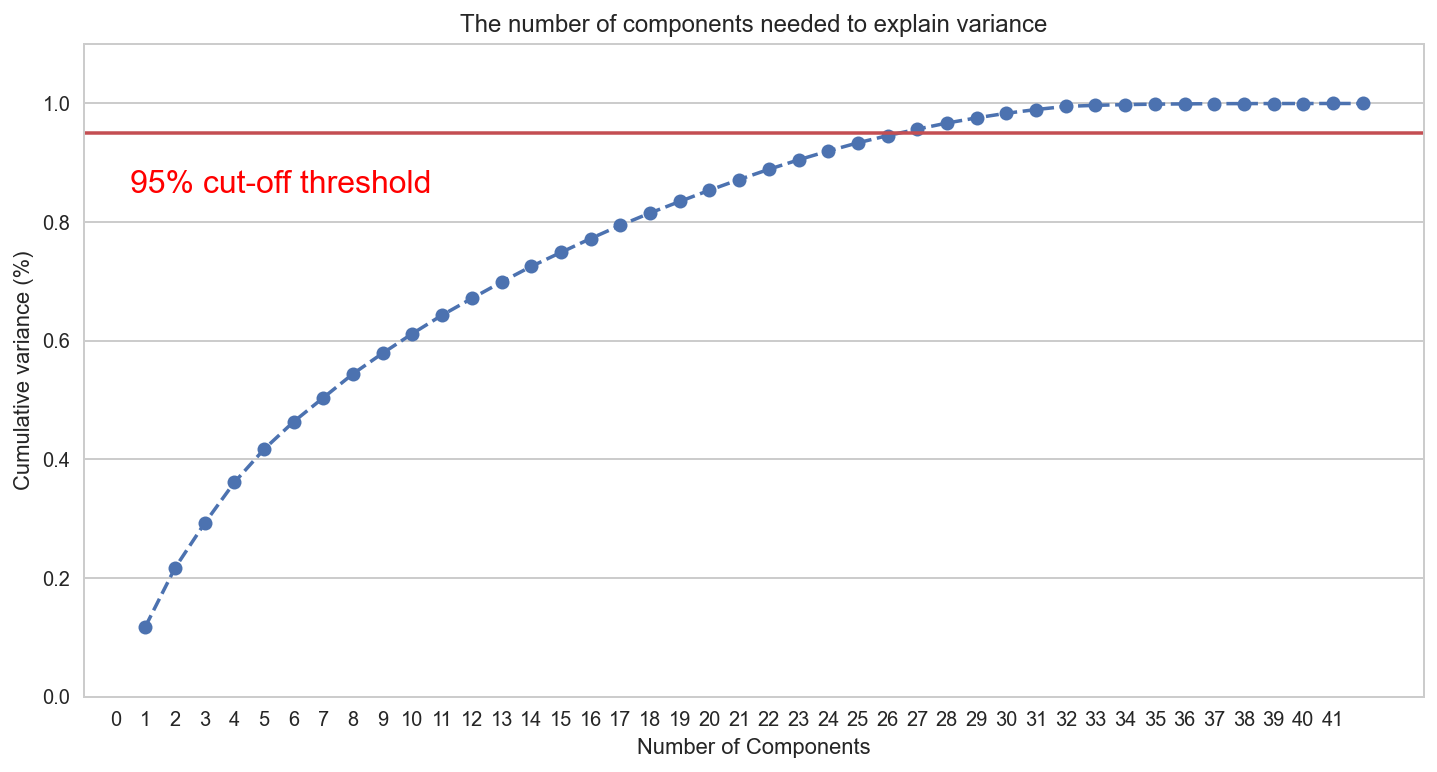

In [14]:
pca2 = PCA().fit(reduced_data)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 43, step=1)
y = np.cumsum(pca2.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 42, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#Keeping PCA component as 17

In [15]:
pc = PCA(n_components=17)
reduced_data = pc.fit_transform(data_tr_std)
reduced_data.shape

(15080, 17)

In [16]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(reduced_data)

In [ ]:
#Checking the Optimal number of cluster

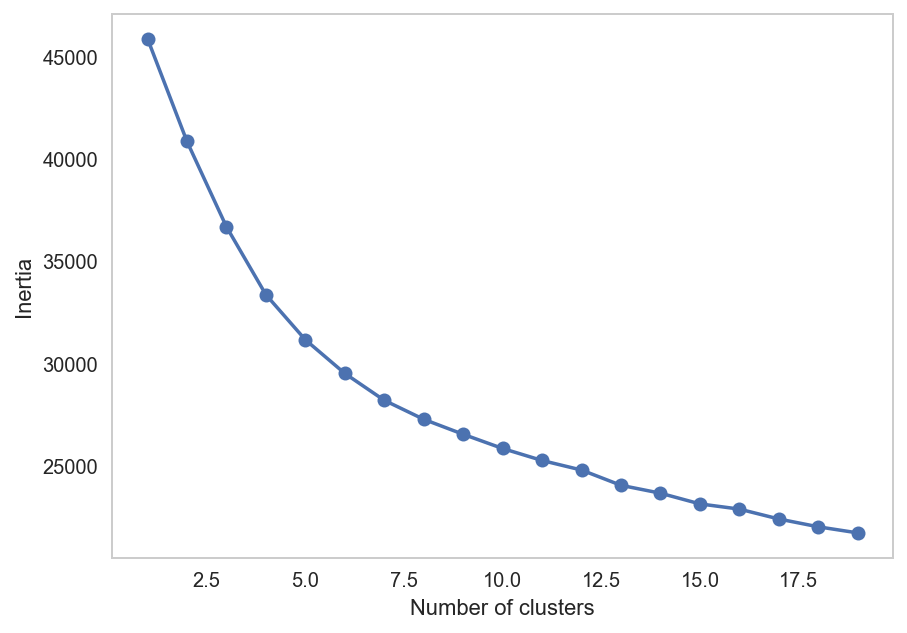

None

In [18]:
# THE ELBOW METHOD : the sum of squares at each number of clusters is calculated and graphed, 
#and the user looks for a change of slope from steep to shallow (an elbow) to determine the optimal number of clusters

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(reduced_data)
    SSE.append(kmeans.inertia_) #within cluster sum of squares

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(7,5))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
display(plt.show())

In [ ]:
#silhouette_score

In [19]:
from sklearn.metrics import silhouette_score

for n_clusters in range(3, 8):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    y = clusterer.fit_predict(reduced_data)
    message = "For n_clusters = {} The average silhouette_score is: {}"
    print(message.format(n_clusters, round(silhouette_score(reduced_data, y), 2)))

For n_clusters = 3 The average silhouette_score is: 0.14
For n_clusters = 4 The average silhouette_score is: 0.15
For n_clusters = 5 The average silhouette_score is: 0.16
For n_clusters = 6 The average silhouette_score is: 0.16
For n_clusters = 7 The average silhouette_score is: 0.16


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.14821205210284533
For n_clusters = 3 The average silhouette_score is : 0.1370807683020202
For n_clusters = 4 The average silhouette_score is : 0.14854889162507548
For n_clusters = 5 The average silhouette_score is : 0.1557588743342819
For n_clusters = 6 The average silhouette_score is : 0.1642761584394097
For n_clusters = 7 The average silhouette_score is : 0.1591653295594261


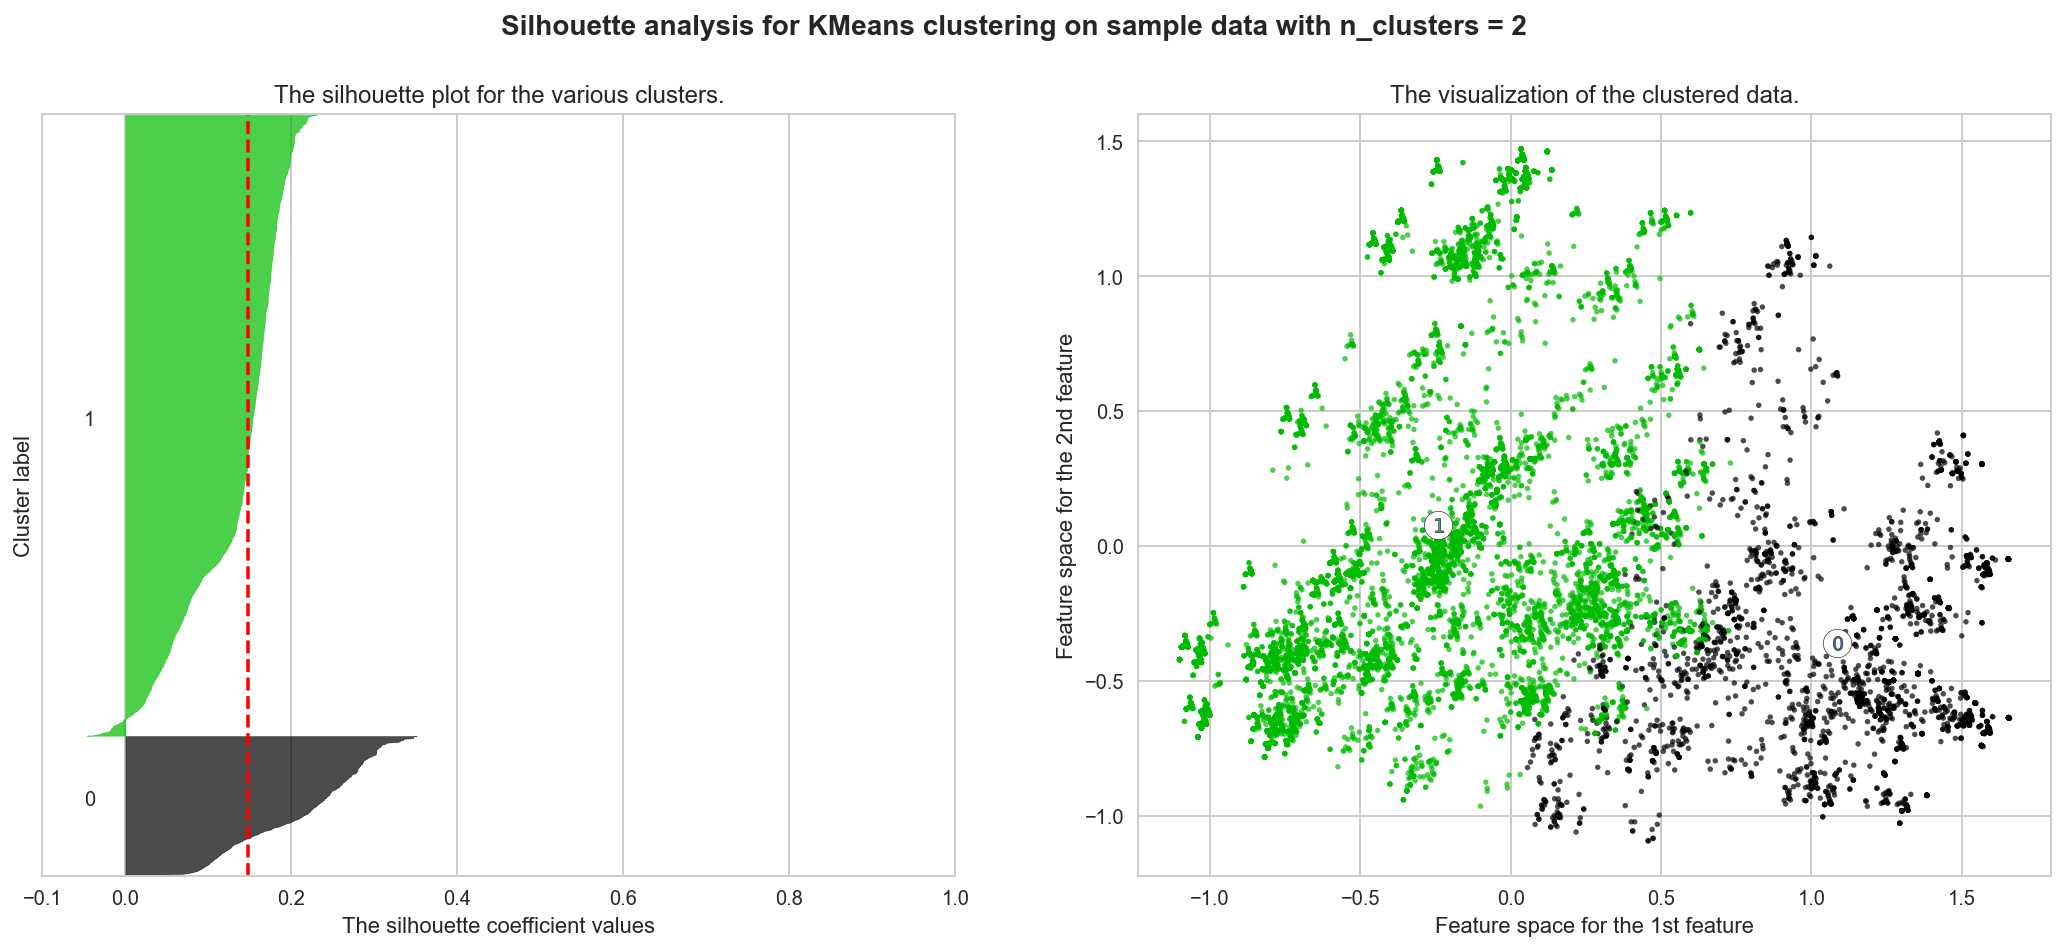

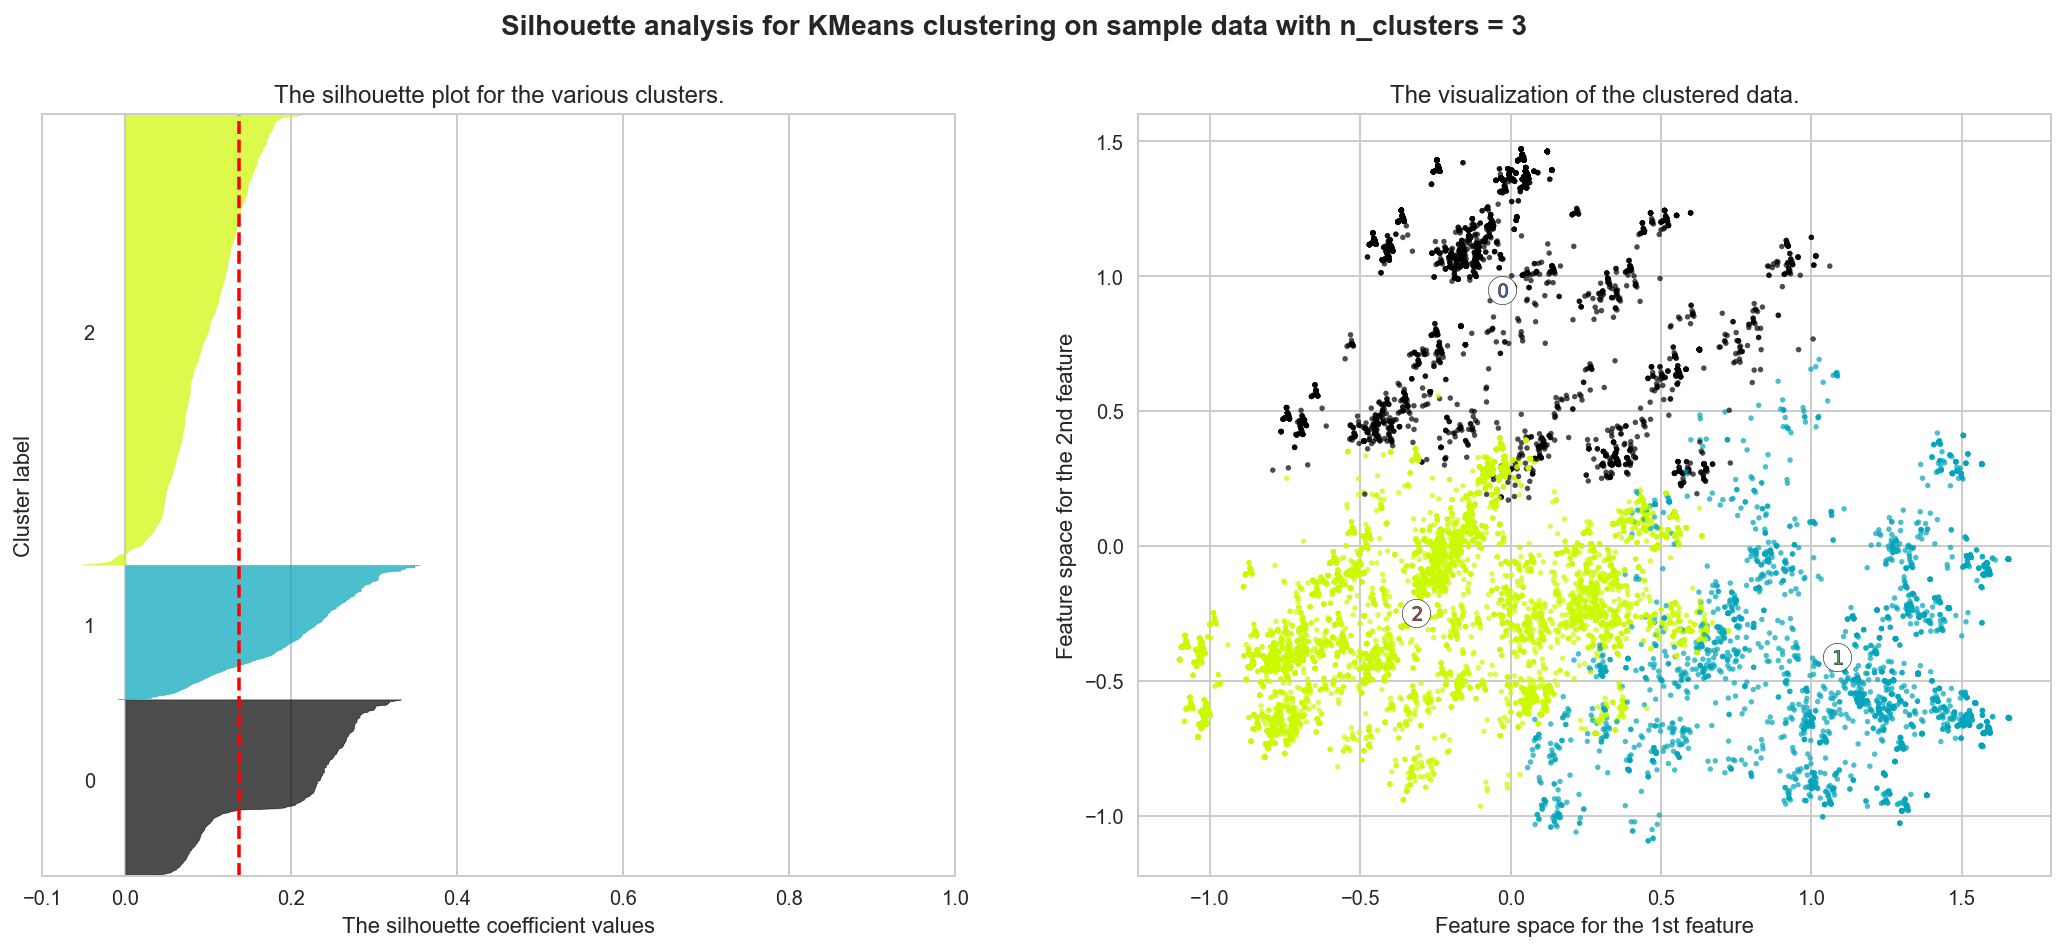

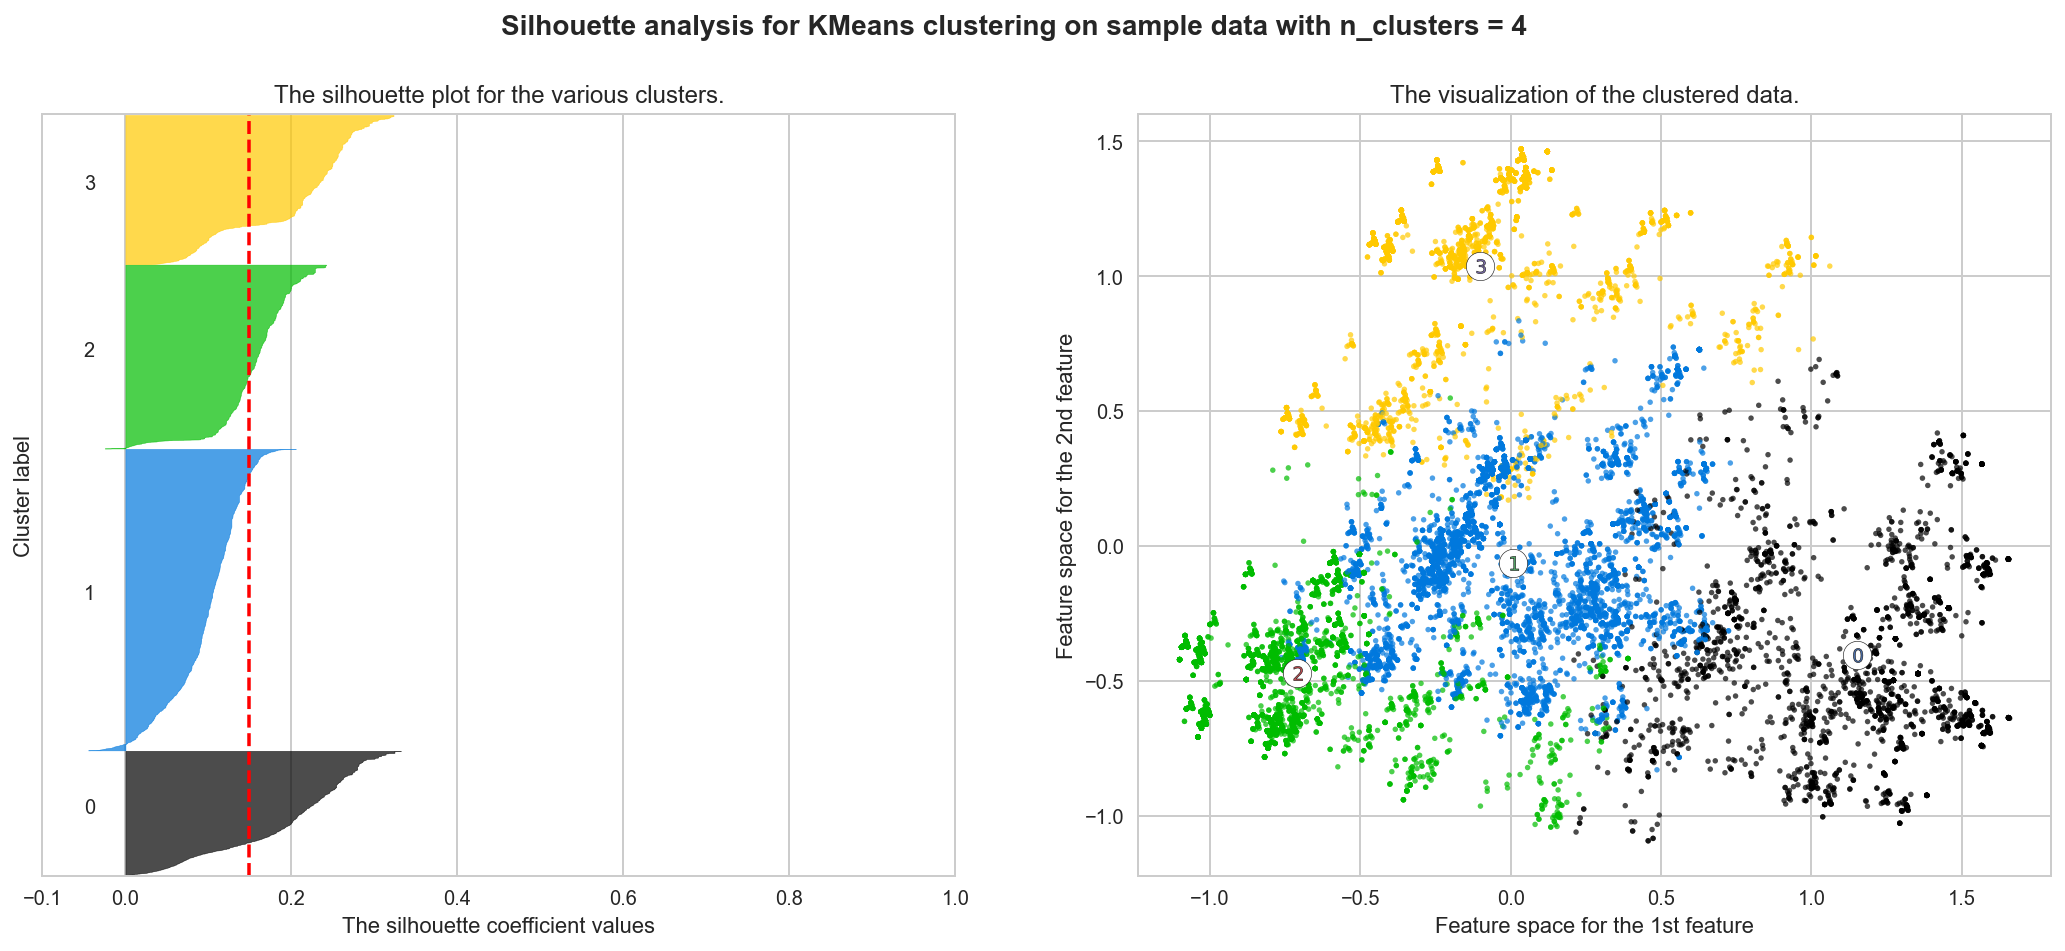

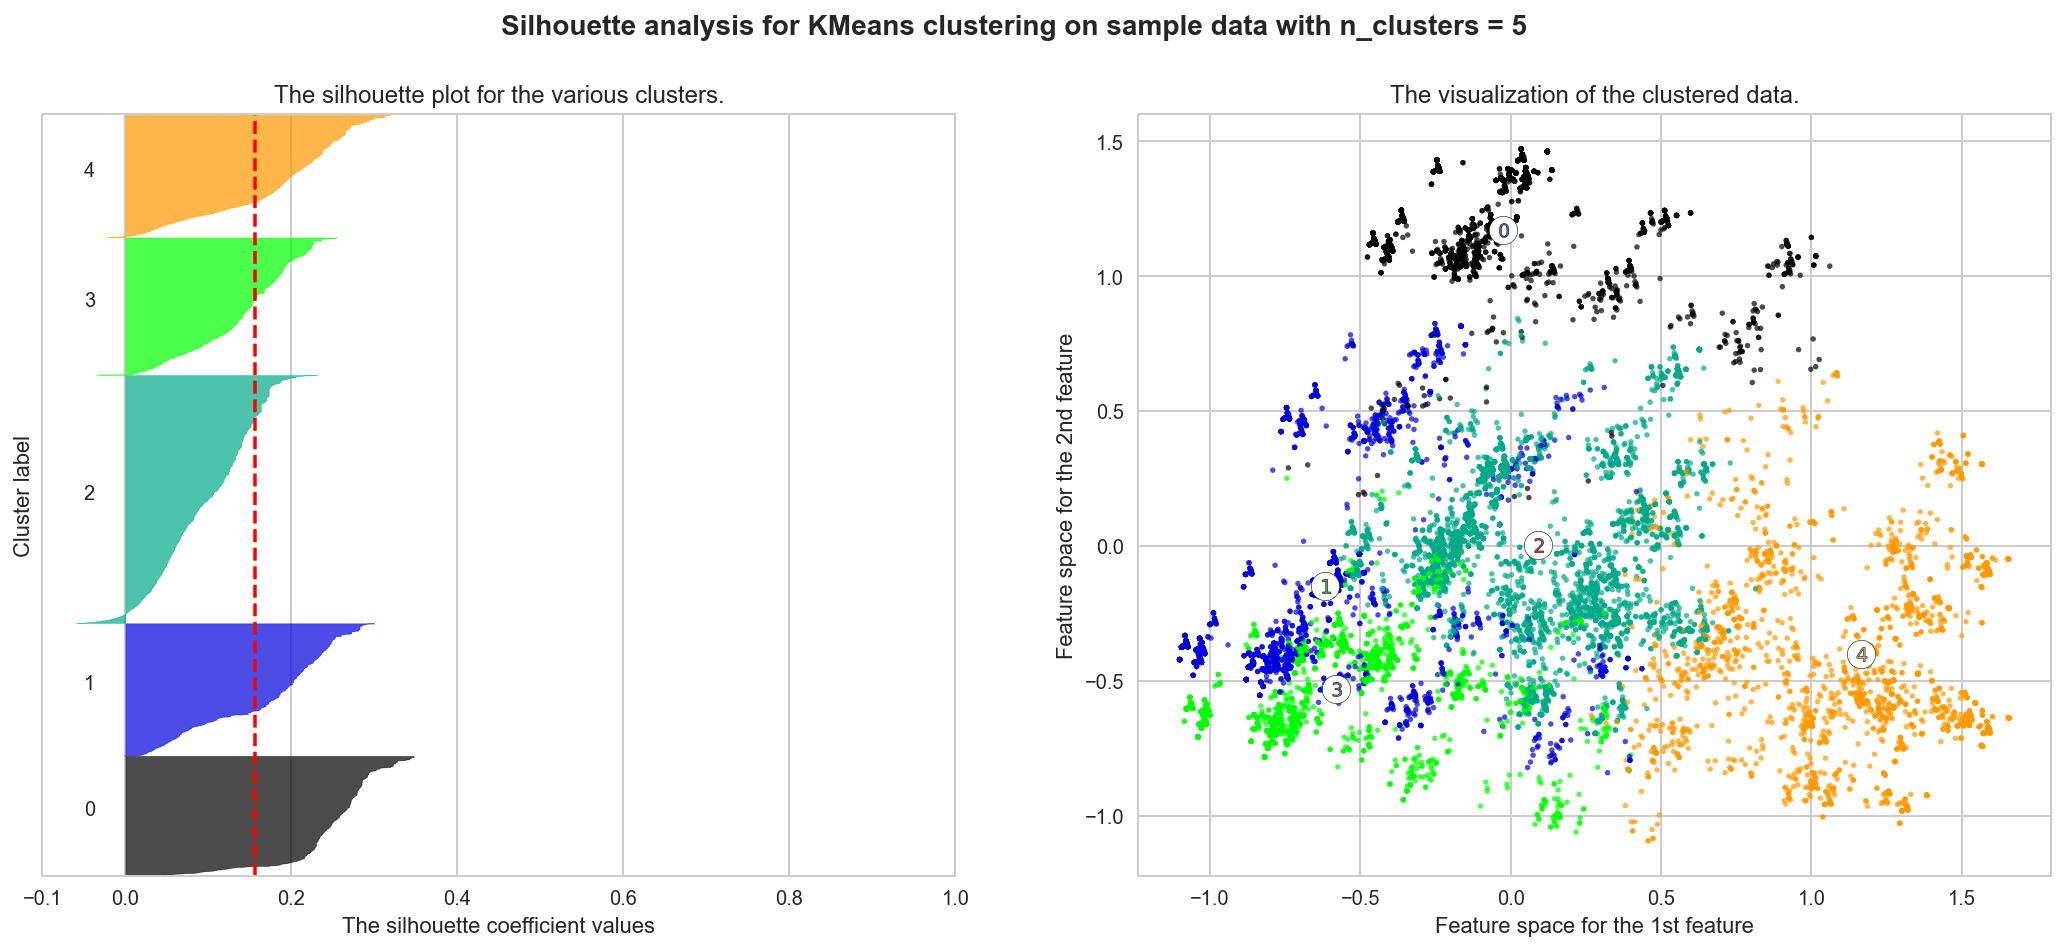

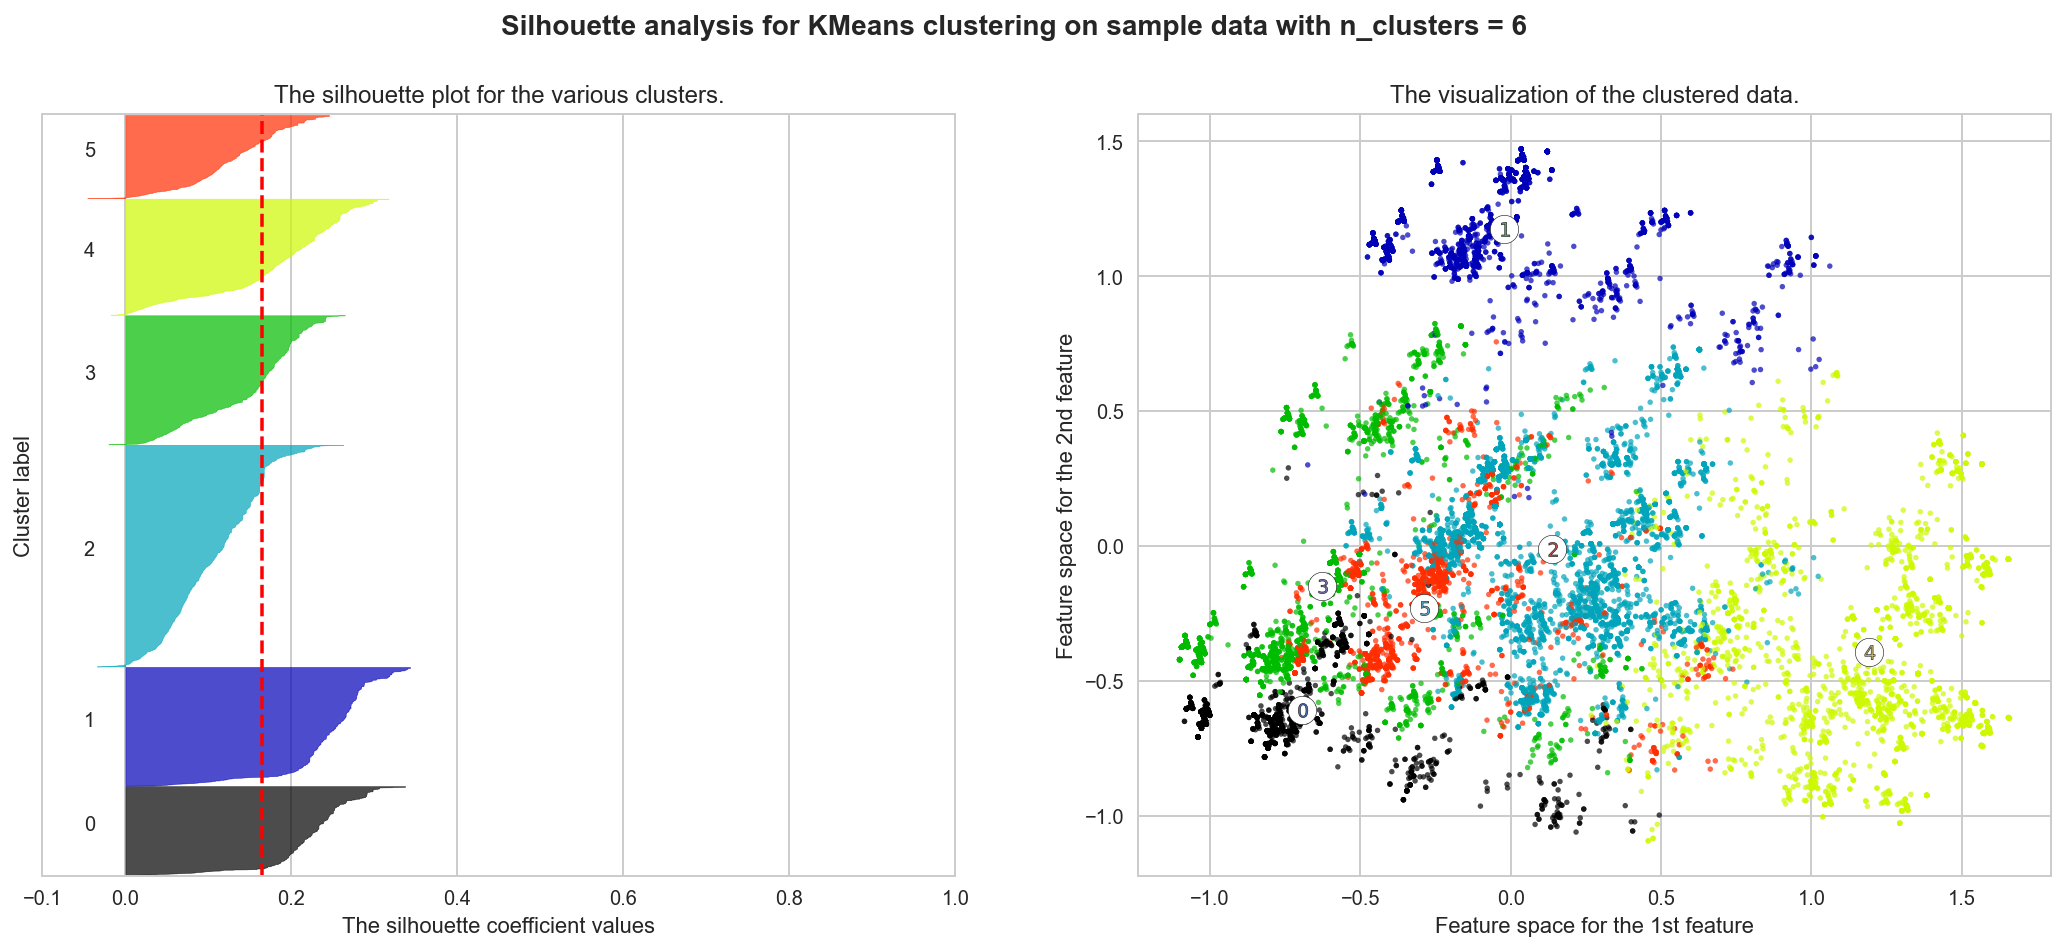

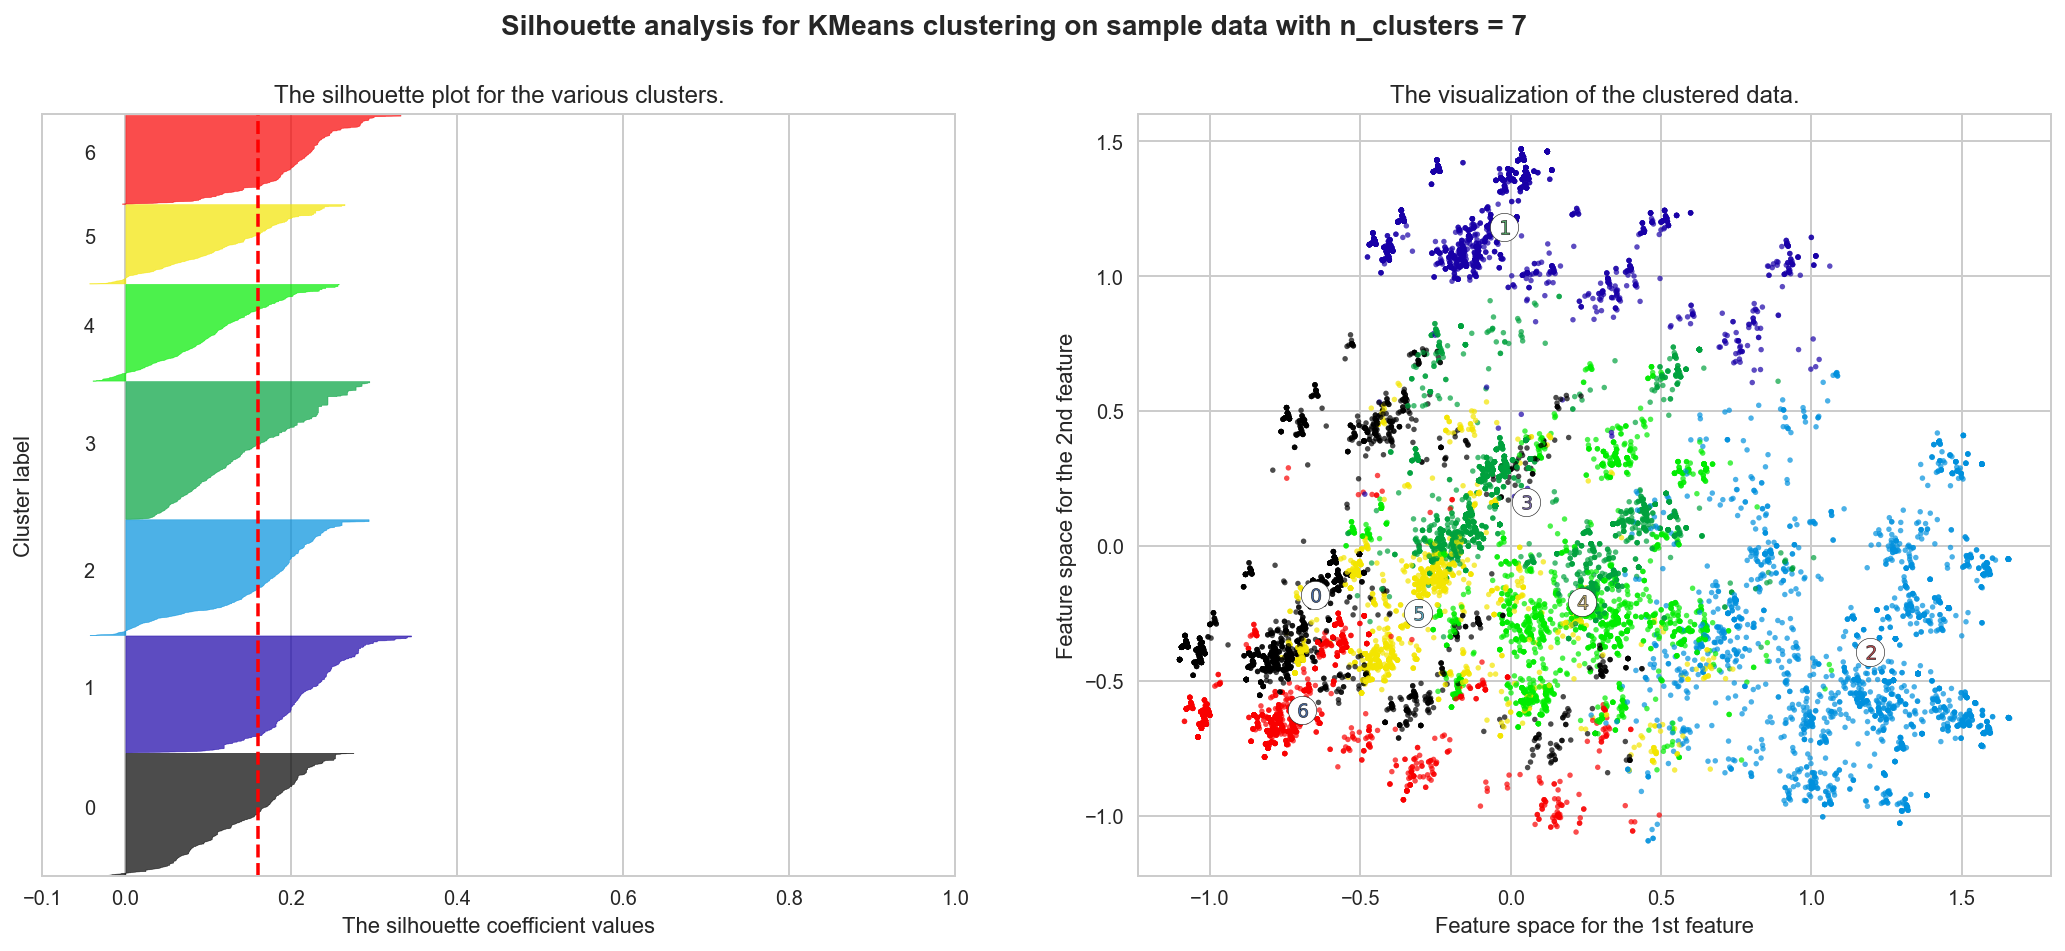

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(reduced_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#Applying Kmeans Clustering Model, and check the results for cluster 3-9 

In [21]:
#Cluster3: the data
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters3'] = kmeans_3.labels_
data.clusters3.value_counts(normalize=True)

2    0.448740
1    0.304973
0    0.246286
Name: clusters3, dtype: float64

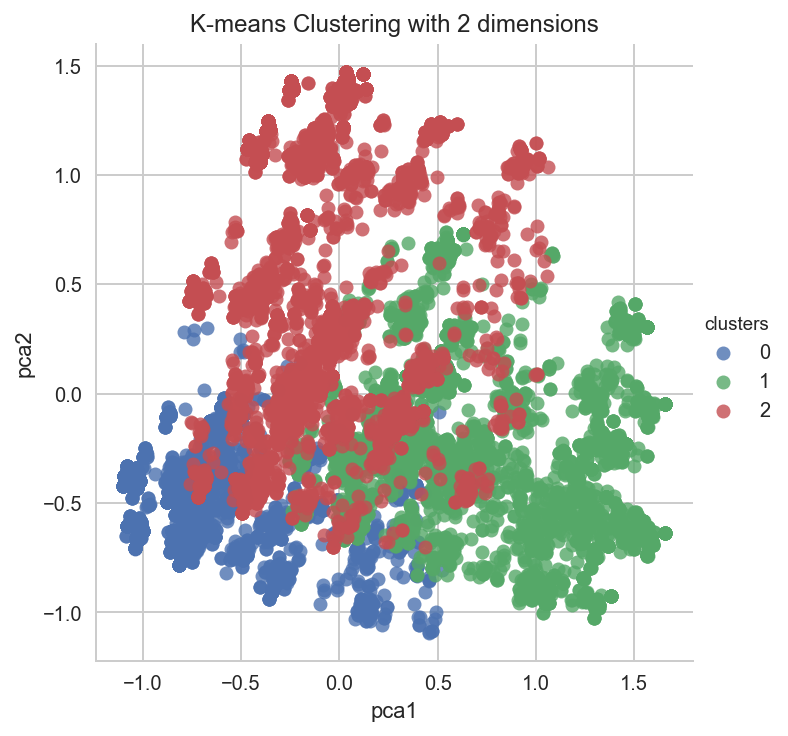

None

In [22]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_3.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [23]:
#Cluster 4 the data
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters4'] = kmeans_4.labels_
data.clusters4.value_counts(normalize=True)

0    0.397347
1    0.240053
2    0.196684
3    0.165915
Name: clusters4, dtype: float64

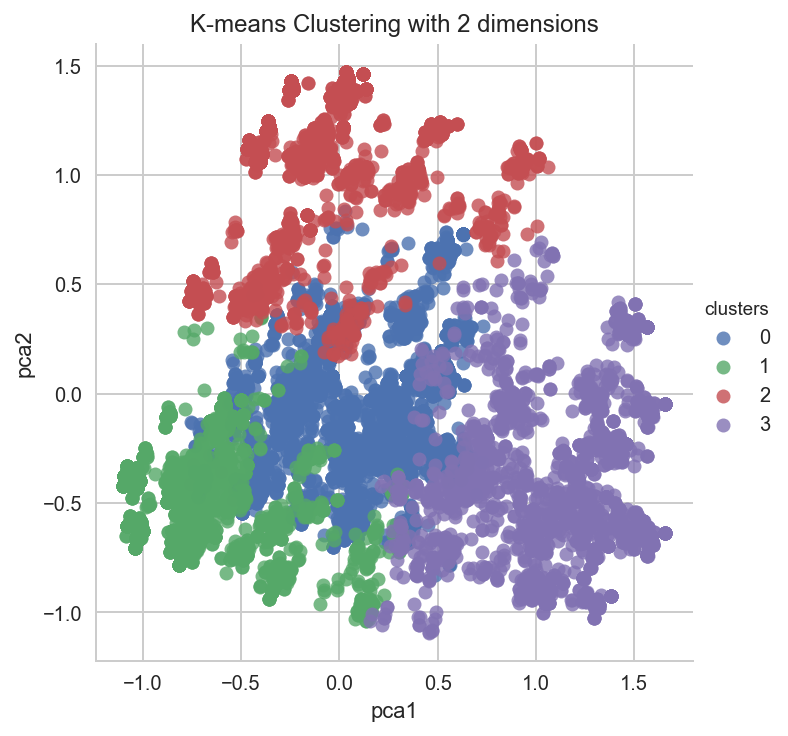

None

In [25]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_4.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [26]:
#Cluster 5 the data
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters5'] = kmeans_5.labels_
data.clusters5.value_counts(normalize=True)

1    0.326857
4    0.180836
2    0.174271
3    0.160942
0    0.157095
Name: clusters5, dtype: float64

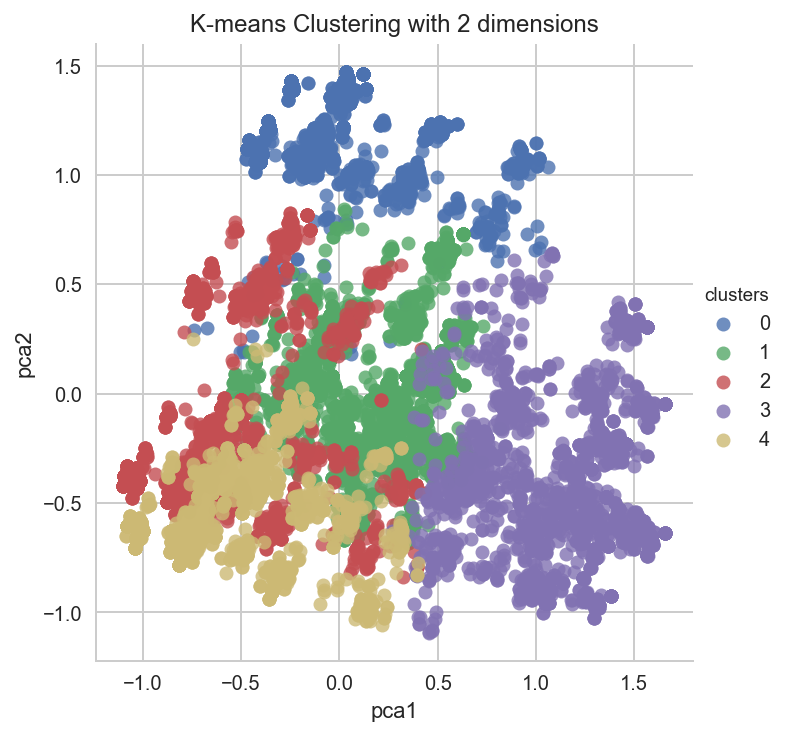

None

In [27]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_5.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [28]:
#Cluster 6 the data
kmeans_6 = KMeans(n_clusters=6, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters6'] = kmeans_6.labels_
data.clusters6.value_counts(normalize=True)

3    0.292573
4    0.170358
0    0.156631
2    0.152586
1    0.117308
5    0.110544
Name: clusters6, dtype: float64

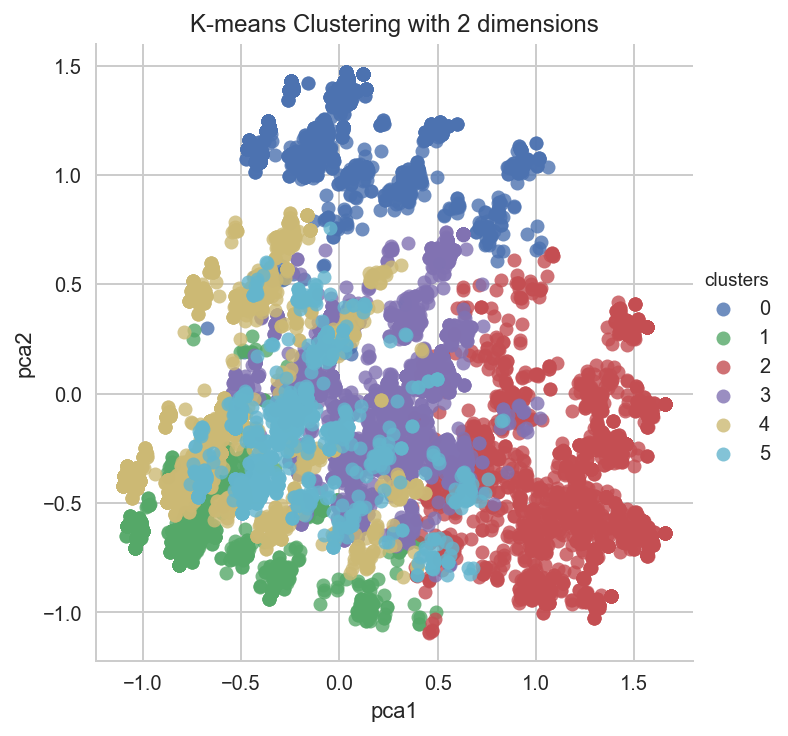

None

In [29]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_6.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [30]:
#Cluster 7 the data
kmeans_7 = KMeans(n_clusters=7, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters7'] = kmeans_7.labels_
data.clusters7.value_counts(normalize=True)

5    0.182294
1    0.162003
2    0.154377
3    0.152321
4    0.124867
6    0.116976
0    0.107162
Name: clusters7, dtype: float64

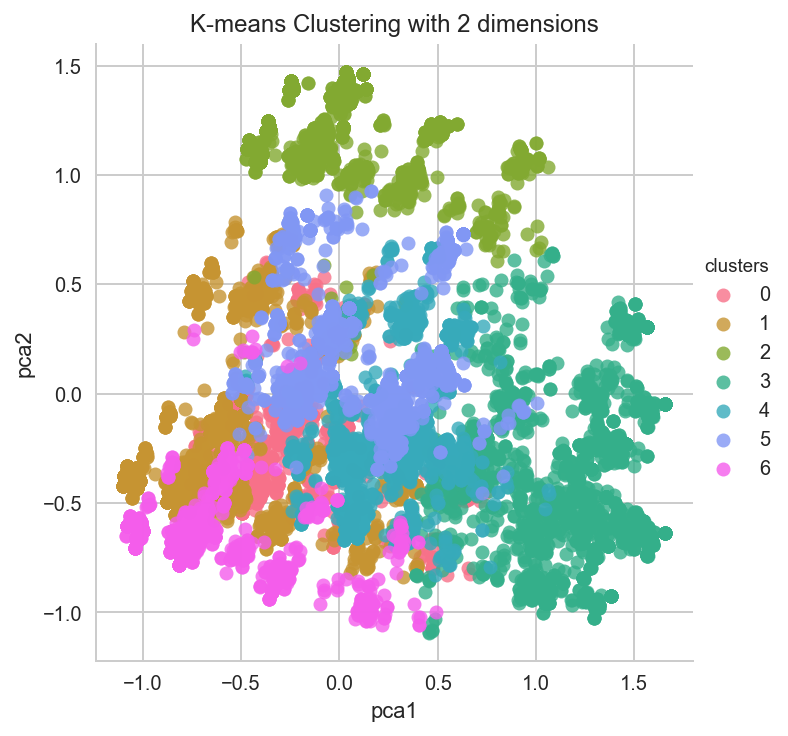

None

In [31]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_7.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [32]:
#Cluster 8 the data
kmeans_8 = KMeans(n_clusters=8, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters8'] = kmeans_8.labels_
data.clusters8.value_counts(normalize=True)

0    0.154111
6    0.146552
7    0.138727
3    0.130968
1    0.130570
4    0.115517
2    0.102719
5    0.080836
Name: clusters8, dtype: float64

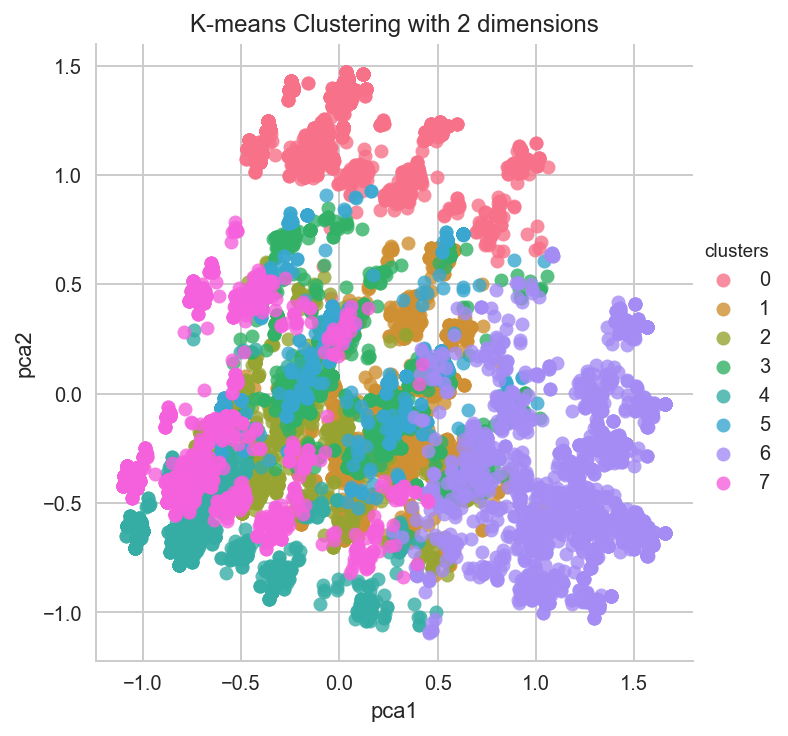

None

In [33]:
twod_pca = PCA(n_components=2).fit_transform(data_tr_std)
results_2d_pca = pd.DataFrame(twod_pca,columns=['pca1','pca2'])
results_2d_pca['clusters'] = kmeans_8.labels_
sns.lmplot(x= 'pca1', y= 'pca2', hue= 'clusters', data=results_2d_pca, fit_reg=False)
plt.title('K-means Clustering with 2 dimensions')
display(plt.show())

In [34]:
#Cluster 9 the data
kmeans_9 = KMeans(n_clusters=9, random_state=0).fit(reduced_data)
#Glue back to original data
data['clusters9'] = kmeans_9.labels_
data.clusters9.value_counts(normalize=True)

0    0.149536
8    0.126923
1    0.126724
6    0.115849
3    0.113992
7    0.108156
5    0.108156
4    0.086340
2    0.064324
Name: clusters9, dtype: float64